Mounted at /content/drive
fashion-mnist_test.csv	 lab02.ipynb  lab04.ipynb    seed_dataset.txt
fashion-mnist_train.csv  lab03.ipynb  project.ipynb  Untitled0.ipynb
Data preview:
   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      0       0       0       0       0       0       0       0       9   
1      1       0       0       0       0       0       0       0       0   
2      2       0       0       0       0       0       0      14      53   
3      2       0       0       0       0       0       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       8  ...       103        87        56         0         0         0   
1       0  ...        34         0         0         0         0         0   
2      99  ...         0         0         0         0        63        53   
3       0  ...       137       126       140         

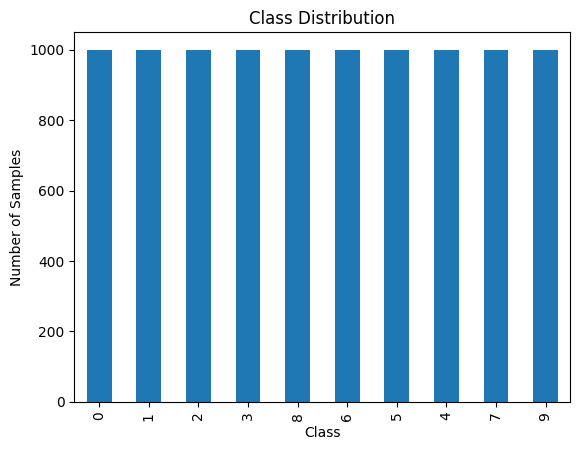

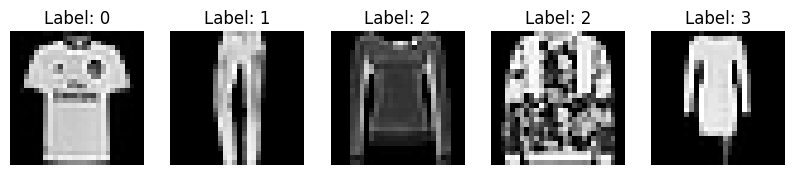

In [1]:
# 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')
!ls "/content/drive/My Drive/Colab Notebooks"

data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/fashion-mnist_test.csv")

# Data structure summary
print("Data preview:")
print(data.head())
print("\nDataset size:", data.shape)

# Data types in the dataset
print("\nData types:")
print(data.dtypes)

# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())

# Class distribution (assuming the first column is the label)
if 'label' in data.columns:
    class_distribution = data['label'].value_counts()
    print("\nClass distribution:")
    print(class_distribution)

    # Plot class distribution
    class_distribution.plot(kind='bar', title='Class Distribution', xlabel='Class', ylabel='Number of Samples')
    plt.show()

# Display a few sample images (assuming data is in 28x28 pixel format from column 1 onwards)
def plot_images(data, num_images=5):
    images = data.iloc[:, 1:].values.reshape(-1, 28, 28)  # Reshape to 28x28 matrices
    labels = data['label'].values if 'label' in data.columns else None

    plt.figure(figsize=(10, 2))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.axis('off')
        if labels is not None:
            plt.title(f"Label: {labels[i]}")
    plt.show()

# Display sample images
plot_images(data)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.6 MB/s eta 0:00:00
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
fashion-mnist_test.csv	 lab02.ipynb  lab04.ipynb    seed_dataset.txt
fashion-mnist_train.csv  lab03.ipynb  project.ipynb  Untitled0.ipynb
Explained variance ratio by PCA: [0.2203887  0.14443455]


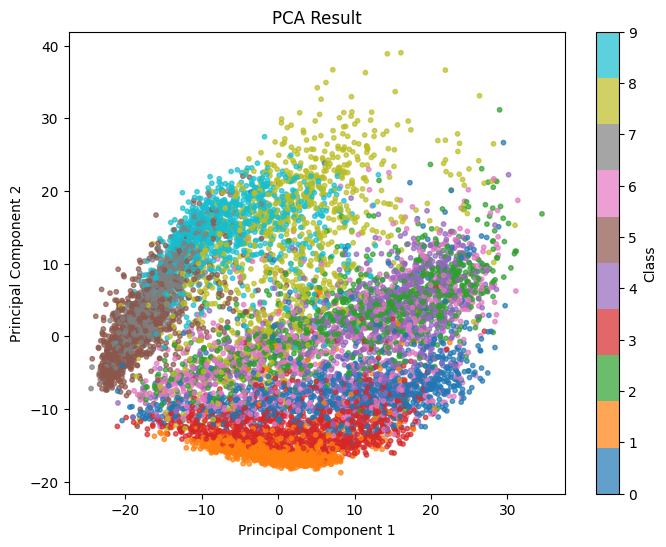

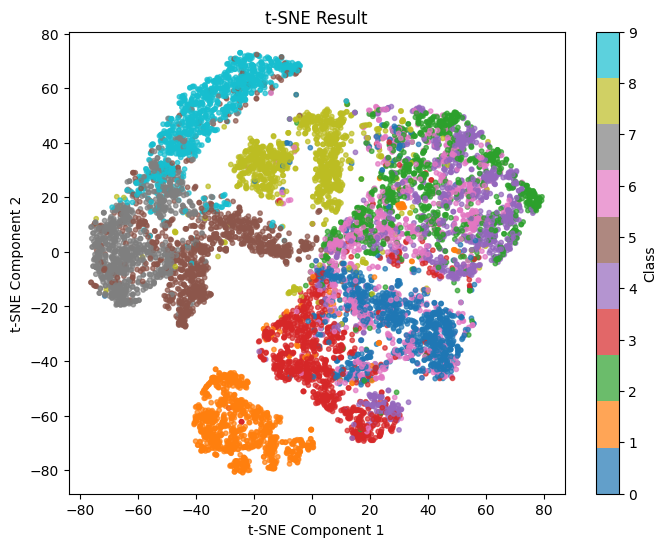

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


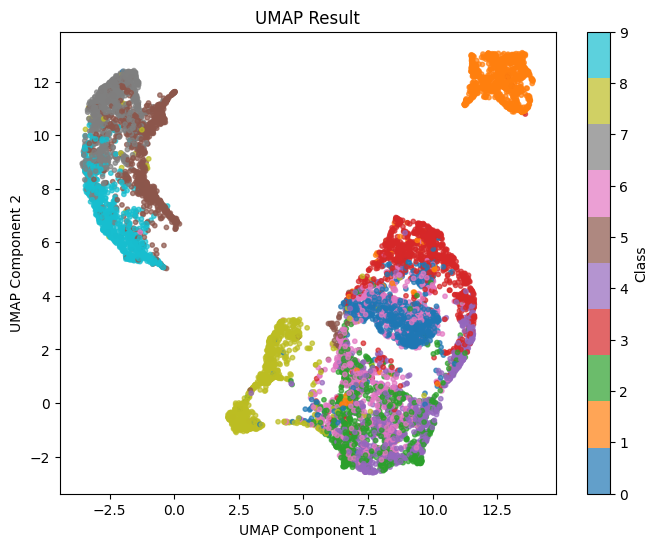

PCA captures linear variance structure well.
t-SNE and UMAP focus on preserving local structure and may highlight clusters differently.


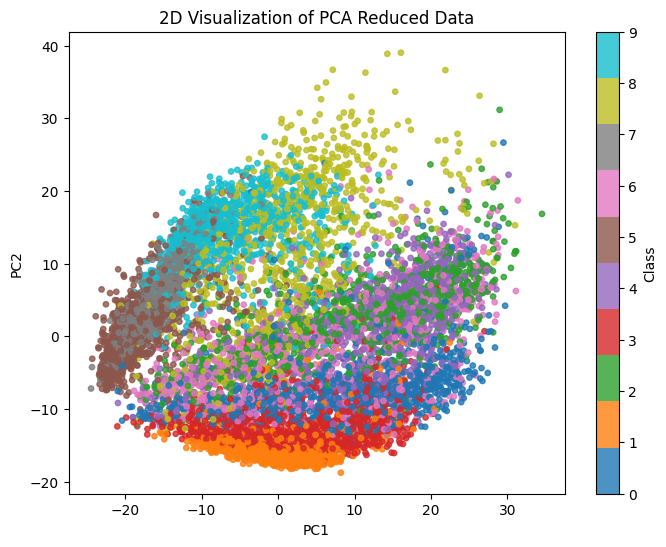

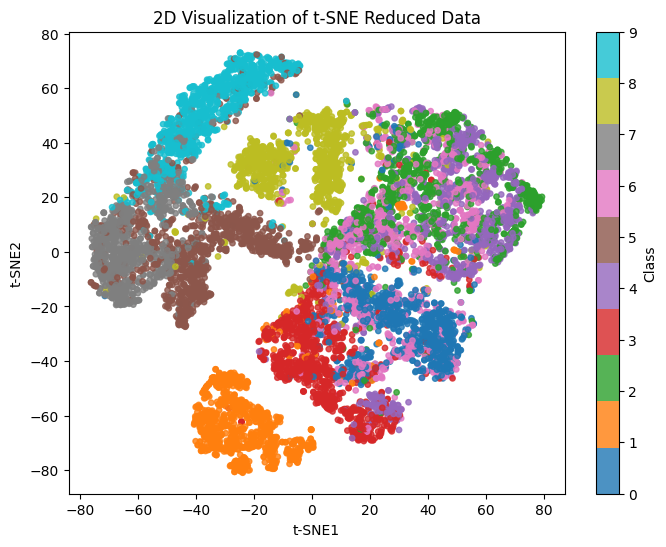

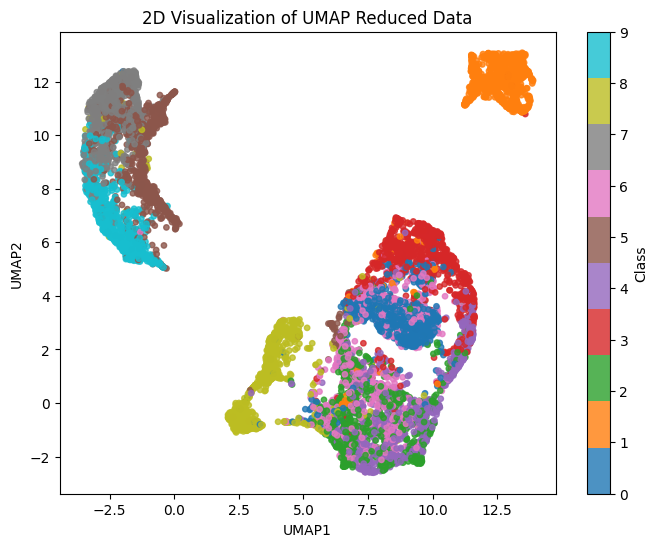

Adjusted Rand Index (K-Means): 0.3387132464199679
Confusion Matrix (K-Means):
[[160 154   2  14   0 131  14  18   0 507]
 [ 20  60   0   8   0  15   1 895   0   1]
 [295  35   0 523   0 107  15   1   0  24]
 [ 50 399   0   7   0 104   0 434   0   6]
 [157 211   0 560   0  54   4  14   0   0]
 [  7   1 232   0  72 635   1   0  52   0]
 [298 121   0 251   1 194  18   8   0 109]
 [  0   0 771   0 142  85   0   0   2   0]
 [304   8  50  30  24  79 497   1   4   3]
 [  6   0  42   0 582  31   0   0 339   0]]


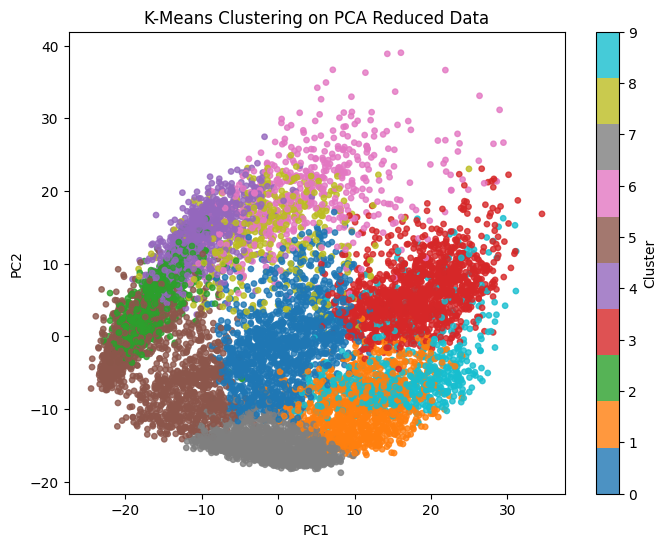

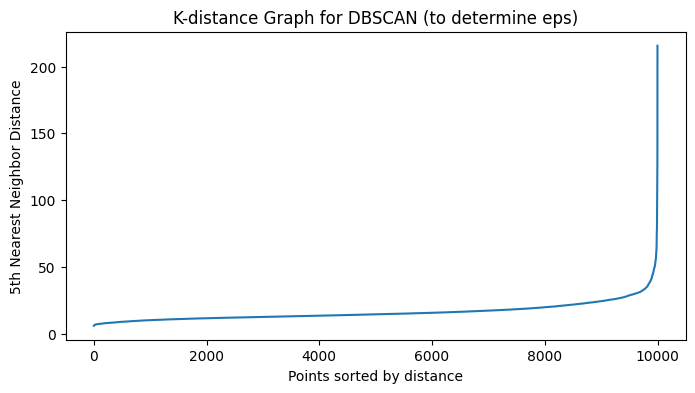

Adjusted Rand Index (DBSCAN): 0.030961595638699185
Confusion Matrix (DBSCAN):
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [ 823    0  177    0    0    0    0    0    0    0    0    0    0    0]
 [ 247  748    2    3    0    0    0    0    0    0    0    0    0    0]
 [ 901    0   62    0    0   22    0    1    1   11    0    0    2    0]
 [ 829    0   20  136    0    0    0    0    0    0   15    0    0    0]
 [ 942    0   35    0    0    6    0    3   10    2    0    0    2    0]
 [ 953    0    0    0    3    0   30    0    0    0    0    0    0   14]
 [ 764    0  200    1    0    0    0   17    0    0    0    0   18    0]
 [ 852    0    2    0  122    0    0    0    0    0    0   24    0    0]
 [ 999    0    1    0    0    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0

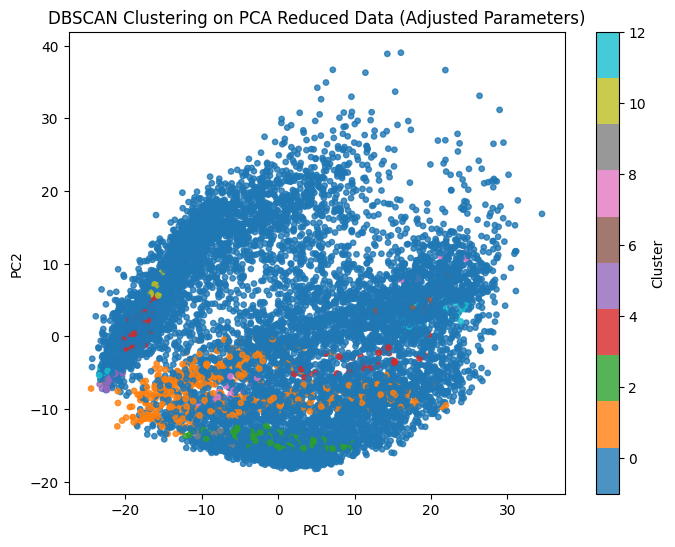

Number of outliers detected by DBSCAN: 8310
Training set size: (8000, 784), Testing set size: (2000, 784)
Random Forest Results:
Accuracy: 0.8828
Precision: 0.8815263935360322
Recall: 0.8828
F1-Score: 0.8811698846178406
k-Nearest Neighbors Results:
Accuracy: 0.8611
Precision: 0.8633759819532064
Recall: 0.8611
F1-Score: 0.8607579436307318
Support Vector Machine Results:
Accuracy: 0.8943
Precision: 0.8935083155677134
Recall: 0.8943
F1-Score: 0.8935613161898202


In [2]:
# 2

# Install UMAP if not already installed
!pip install umap-learn


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')
!ls "/content/drive/My Drive/Colab Notebooks"

data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/fashion-mnist_test.csv")


# Extract features and labels (assuming the first column is the label)
if 'label' in data.columns:
    labels = data['label']
    features = data.iloc[:, 1:]
else:
    labels = None
    features = data

# Standardize features
features = (features - features.mean()) / features.std()

# 1. PCA (Principal Component Analysis)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features)
print("Explained variance ratio by PCA:", pca.explained_variance_ratio_)

# Plot PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='tab10', s=10, alpha=0.7)
plt.colorbar(label='Class')
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# 2. t-SNE (t-distributed Stochastic Neighbor Embedding)
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_result = tsne.fit_transform(features)

# Plot t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap='tab10', s=10, alpha=0.7)
plt.colorbar(label='Class')
plt.title('t-SNE Result')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

# 3. UMAP (Uniform Manifold Approximation and Projection)
umap_reducer = umap.UMAP(n_components=2, random_state=42)
umap_result = umap_reducer.fit_transform(features)

# Plot UMAP results
plt.figure(figsize=(8, 6))
plt.scatter(umap_result[:, 0], umap_result[:, 1], c=labels, cmap='tab10', s=10, alpha=0.7)
plt.colorbar(label='Class')
plt.title('UMAP Result')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.show()

# Compare methods
print("PCA captures linear variance structure well.")
print("t-SNE and UMAP focus on preserving local structure and may highlight clusters differently.")





#3

# Visualization of reduced datasets
# Visualizing PCA in 2D
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='tab10', s=15, alpha=0.8)
plt.colorbar(label='Class')
plt.title('2D Visualization of PCA Reduced Data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Visualizing t-SNE in 2D
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap='tab10', s=15, alpha=0.8)
plt.colorbar(label='Class')
plt.title('2D Visualization of t-SNE Reduced Data')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.show()

# Visualizing UMAP in 2D
plt.figure(figsize=(8, 6))
plt.scatter(umap_result[:, 0], umap_result[:, 1], c=labels, cmap='tab10', s=15, alpha=0.8)
plt.colorbar(label='Class')
plt.title('2D Visualization of UMAP Reduced Data')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.show()


# 4
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import confusion_matrix, adjusted_rand_score

# 4. Clustering Data
# K-Means Clustering
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans_labels = kmeans.fit_predict(features)

# Evaluate K-Means
if labels is not None:
    ari_kmeans = adjusted_rand_score(labels, kmeans_labels)
    print(f"Adjusted Rand Index (K-Means): {ari_kmeans}")
    print("Confusion Matrix (K-Means):")
    print(confusion_matrix(labels, kmeans_labels))

# Plot K-Means Clustering (on PCA reduced data)
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans_labels, cmap='tab10', s=15, alpha=0.8)
plt.title('K-Means Clustering on PCA Reduced Data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.show()


# Distance analysis to estimate eps
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(features)
distances, indices = neighbors_fit.kneighbors(features)
distances = np.sort(distances[:, -1])  # Sort distances by the 5th nearest neighbor

# Plot k-distance graph
plt.figure(figsize=(8, 4))
plt.plot(distances)
plt.title("K-distance Graph for DBSCAN (to determine eps)")
plt.xlabel("Points sorted by distance")
plt.ylabel("5th Nearest Neighbor Distance")
plt.show()


# After analyzing the graph, set eps (e.g., at the elbow point)
eps_optimal = 11
min_samples = 11

# DBSCAN with new parameters
dbscan = DBSCAN(eps=eps_optimal, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(features)

# Evaluate DBSCAN
if labels is not None:
    ari_dbscan = adjusted_rand_score(labels, dbscan_labels)
    print(f"Adjusted Rand Index (DBSCAN): {ari_dbscan}")
    print("Confusion Matrix (DBSCAN):")
    print(confusion_matrix(labels, dbscan_labels))

# Plot DBSCAN clustering results
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=dbscan_labels, cmap='tab10', s=15, alpha=0.8)
plt.title('DBSCAN Clustering on PCA Reduced Data (Adjusted Parameters)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.show()

# Number of outliers detected
outliers = np.sum(dbscan_labels == -1)
print(f"Number of outliers detected by DBSCAN: {outliers}")


# 5
from sklearn.model_selection import train_test_split
# 5. Split Data into Training and Testing Sets
# Ensure labels exist for this step
if labels is not None:
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
    print(f"Training set size: {X_train.shape}, Testing set size: {X_test.shape}")
else:
    print("Labels are not available; skipping data split.")



# 6
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Load data from CSV file
file_path_train = '/mnt/data/fashion-mnist_train.csv'
file_path_test = '/mnt/data/fashion-mnist_test.csv'

train_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/fashion-mnist_train.csv")
test_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/fashion-mnist_test.csv")

# Extract features and labels for training and testing
if 'label' in train_data.columns and 'label' in test_data.columns:
    train_labels = train_data['label']
    train_features = train_data.iloc[:, 1:]
    test_labels = test_data['label']
    test_features = test_data.iloc[:, 1:]
else:
    raise ValueError("The provided datasets do not contain 'label' columns.")

# Standardize features
train_features = (train_features - train_features.mean()) / train_features.std()
test_features = (test_features - test_features.mean()) / test_features.std()

# 6. Classification and Evaluation
# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(train_features, train_labels)
rf_predictions = rf_classifier.predict(test_features)

# Evaluate Random Forest
rf_accuracy = accuracy_score(test_labels, rf_predictions)
rf_precision = precision_score(test_labels, rf_predictions, average='weighted')
rf_recall = recall_score(test_labels, rf_predictions, average='weighted')
rf_f1 = f1_score(test_labels, rf_predictions, average='weighted')

print("Random Forest Results:")
print(f"Accuracy: {rf_accuracy}")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print(f"F1-Score: {rf_f1}")

# k-Nearest Neighbors (KNN)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(train_features, train_labels)
knn_predictions = knn_classifier.predict(test_features)

# Evaluate KNN
knn_accuracy = accuracy_score(test_labels, knn_predictions)
knn_precision = precision_score(test_labels, knn_predictions, average='weighted')
knn_recall = recall_score(test_labels, knn_predictions, average='weighted')
knn_f1 = f1_score(test_labels, knn_predictions, average='weighted')

print("k-Nearest Neighbors Results:")
print(f"Accuracy: {knn_accuracy}")
print(f"Precision: {knn_precision}")
print(f"Recall: {knn_recall}")
print(f"F1-Score: {knn_f1}")

# Support Vector Machine (SVM)
svm_classifier = SVC(random_state=42)
svm_classifier.fit(train_features, train_labels)
svm_predictions = svm_classifier.predict(test_features)

# Evaluate SVM
svm_accuracy = accuracy_score(test_labels, svm_predictions)
svm_precision = precision_score(test_labels, svm_predictions, average='weighted')
svm_recall = recall_score(test_labels, svm_predictions, average='weighted')
svm_f1 = f1_score(test_labels, svm_predictions, average='weighted')

print("Support Vector Machine Results:")
print(f"Accuracy: {svm_accuracy}")
print(f"Precision: {svm_precision}")
print(f"Recall: {svm_recall}")
print(f"F1-Score: {svm_f1}")

